Epoch 1/32
5/5 [==============================] - 6s 1s/step - loss: 15.0984 - accuracy: 0.6500 - val_loss: 0.2583 - val_accuracy: 0.9000
Epoch 2/32
5/5 [==============================] - 6s 1s/step - loss: 0.4871 - accuracy: 0.8500 - val_loss: 0.6604 - val_accuracy: 0.7000
Epoch 3/32
5/5 [==============================] - 6s 1s/step - loss: 0.3396 - accuracy: 0.8000 - val_loss: 3.3335 - val_accuracy: 0.4000
Epoch 4/32
5/5 [==============================] - 7s 1s/step - loss: 0.3682 - accuracy: 0.8750 - val_loss: 0.8429 - val_accuracy: 0.8000
Epoch 5/32
5/5 [==============================] - 7s 1s/step - loss: 0.0809 - accuracy: 1.0000 - val_loss: 1.7318 - val_accuracy: 0.6000
Epoch 6/32
5/5 [==============================] - 7s 1s/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.6982 - val_accuracy: 0.9000
Epoch 7/32
5/5 [==============================] - 7s 1s/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 1.1852 - val_accuracy: 0.7000
Epoch 8/32
5/5 [========================

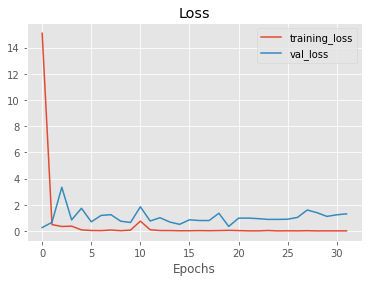

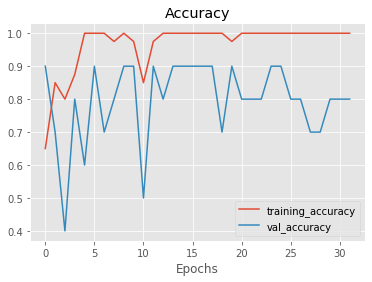

In [7]:
import numpy as np
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
#from tensorflow
plt.style.use('ggplot')

augment=ImageDataGenerator(rotation_range=10, fill_mode='nearest')
f_vectors=[]
all_labels=[]
for add in glob.glob ('C:\\Users\\Asus\\Desktop\\Dore\\covid dataset\\dataset\\*\\*'):
    img=cv2.imread(add)
    img=cv2.resize(img,(224,224))
    f_vectors.append(img)
    
    label=add.split('\\')[7]
    all_labels.append(label)
    
l_e=LabelEncoder()
int_encoding=l_e.fit_transform(all_labels)
one_hot_encoding=to_categorical(int_encoding,2)
f_vectors=np.array(f_vectors)
X_train,X_test,y_train, y_test=train_test_split(f_vectors, one_hot_encoding, test_size=0.2, random_state=42)
modelBase=VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))
for layer in modelBase.layers:
    layer.trainable=False
net=models.Sequential([modelBase,
                     layers.MaxPooling2D(4,4),
                      layers.Flatten(),
                      layers.Dense(64,activation='relu'),
                      layers.Dense(2,activation='softmax')])

net.compile(optimizer='SGD',
           loss='binary_crossentropy',
           metrics=['accuracy'])
history=net.fit(augment.flow(X_train, y_train, batch_size=8),steps_per_epoch=len(X_train)//8,
              validation_data=(X_test, y_test),epochs=32)
loss, acc=net.evaluate(X_test,y_test)
print(loss, acc)
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history)